# Brendon McNulty — ML Final
**Project 7** · Chart a Straight Line (10.16) + Predict Avg High Temp in NYC in January (15.4)

Repo: (https://github.com/brendonmcnulty/datafun-07-ml)

This notebook follows the Module 7 Outline:
- **Part 1**: Chart a Straight Line
- **Part 2**: Data Acquisition · Inspection · Cleaning · Descriptives
- **Part 3**: Build · Test · Predict (2024) · Visualize


In [11]:
import warnings; warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# plotting defaults
plt.rcParams["figure.figsize"] = (7,5)
plt.rcParams["axes.grid"] = True

# data path from your repo
DATA_PATH = "examples/ch15/ave_hi_nyc_jan_1895-2018.csv"
RANDOM_STATE = 11


## Part 1 — Chart a Straight Line (10.16)

Refresh the linear equation **y = m x + b** with a simple Celsius→Fahrenheit line.


In [12]:
import pandas as pd

# Define Fahrenheit as a function of Celsius
f = lambda c: (9 / 5) * c + 32

# Generate temperature pairs for Celsius from -20°C to 50°C in steps of 10
temps = [(c, f(c)) for c in range(-20, 51, 10)]

# Convert list of tuples into a DataFrame
df_temps = pd.DataFrame(temps, columns=['Celsius (°C)', 'Fahrenheit (°F)'])

# Display the DataFrame
df_temps




,Celsius (°C),Fahrenheit (°F)
0,-20,-4.0
1,-10,14.0
2,0,32.0
3,10,50.0
4,20,68.0
5,30,86.0
6,40,104.0
7,50,122.0


### Plotting the Linear Relationship Between Celsius and Fahrenheit

In this step, we visualize the **linear relationship** between Celsius and Fahrenheit using Matplotlib.  
Each point represents a temperature pair, and the straight line shows how the Fahrenheit temperature increases proportionally with Celsius.  
This simple example demonstrates a **perfect linear model** — every data point falls exactly on the line, since the Celsius–Fahrenheit conversion follows the exact equation:

\[
F = \frac{9}{5}C + 32
\]


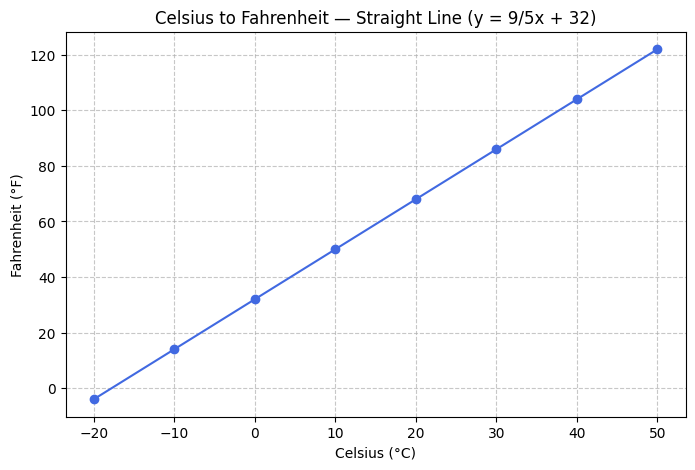

In [13]:
import matplotlib.pyplot as plt

# Plot the Celsius–Fahrenheit relationship
plt.figure(figsize=(8, 5))
plt.plot(df_temps['Celsius (°C)'], df_temps['Fahrenheit (°F)'], marker='o', color='royalblue')

# Add title and labels
plt.title('Celsius to Fahrenheit — Straight Line (y = 9/5x + 32)')
plt.xlabel('Celsius (°C)')
plt.ylabel('Fahrenheit (°F)')
plt.grid(True, linestyle='--', alpha=0.7)

# Display the plot
plt.show()


## Part 2 — Data Acquisition · Inspection · Cleaning · Descriptives

We’ll load the NYC **average January high temperature** dataset, inspect the raw data, clean the
columns (and extract **Year**), and generate quick descriptive stats. This mirrors the workflow
we’ll use before training our regression model in Part 3.


In [14]:
import pandas as pd
import os

DATA_PATH = "examples/ch15/ave_hi_nyc_jan_1895-2018.csv"

assert os.path.exists(DATA_PATH), f"CSV not found at: {DATA_PATH}"
df_raw = pd.read_csv(DATA_PATH)

print("Raw shape:", df_raw.shape)
df_raw.head()


Raw shape: (124, 3)


,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [15]:
display(df_raw.head(3))
display(df_raw.tail(3))
print("\nData types / non-nulls:")
print(df_raw.info())


,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


,Date,Value,Anomaly
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3



Data types / non-nulls:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     124 non-null    int64  
 1   Value    124 non-null    float64
 2   Anomaly  124 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 3.0 KB
None


### Cleaning Steps
- Rename columns to clear, consistent names
- Extract **Year** from the YYYYMM integer in the `Date` column (`Year = Date // 100`)
- Keep only the columns we need and sort by Year
- Set table display precision to 2 decimals


In [16]:
pd.set_option("display.precision", 2)

df = df_raw.copy()
df.columns = ["Date", "Temperature", "Anomaly"]          # match book semantics
df["Year"] = (df["Date"] // 100).astype(int)             # YYYYMM -> YYYY

# keep only the useful columns in a tidy order
df = df[["Year", "Temperature", "Anomaly"]].sort_values("Year").reset_index(drop=True)

print("Cleaned shape:", df.shape)
display(df.head())
display(df.tail())


Cleaned shape: (124, 3)


,Year,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9
3,1898,39.6,2.2
4,1899,36.4,-1.0


,Year,Temperature,Anomaly
119,2014,35.5,-1.9
120,2015,36.1,-1.3
121,2016,40.8,3.4
122,2017,42.8,5.4
123,2018,38.7,1.3


### Descriptive Statistics & First Look
We’ll compute summary stats and draw a quick line plot of **Temperature vs Year** to see the trend.


,Year,Temperature,Anomaly
count,124.00,124.00,124.00
mean,1956.50,37.60,0.20
std,35.94,4.54,4.54
min,1895.00,26.10,-11.30
25%,1925.75,34.58,-2.82
50%,1956.50,37.60,0.20
75%,1987.25,40.60,3.20
max,2018.00,47.60,10.20


Text(0.5, 0, 'Year')

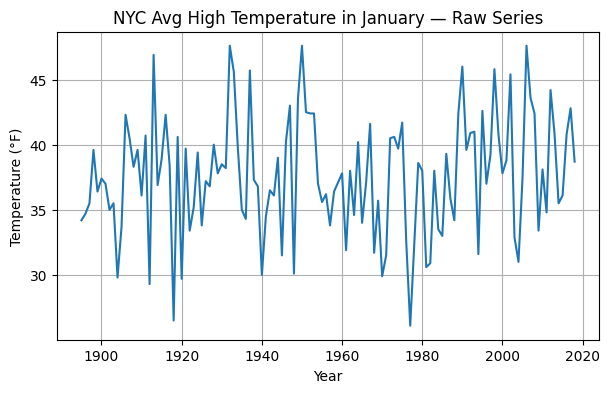

In [17]:
desc = df.describe(include="all")
display(desc)

ax = df.plot(x="Year", y="Temperature", kind="line", legend=False, figsize=(7,4), grid=True)
ax.set_title("NYC Avg High Temperature in January — Raw Series")
ax.set_ylabel("Temperature (°F)")
ax.set_xlabel("Year")
